In [709]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVR

In [710]:
Ftest = pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Test_set.xlsx')
Ftrain=pd.read_excel(r'C:\Users\karti\OneDrive\Desktop\Analytics work\Data_Train.xlsx')

In [711]:
Ftrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [712]:
Ftest.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [713]:

Ftrain.shape,Ftest.shape

((10683, 11), (2671, 10))

In [714]:
Ftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [715]:
Ftrain.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [716]:
#Null values in a training dataset
Ftrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [717]:
Ftrain.dropna(inplace=True)

In [718]:
Ftrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [719]:
Ftest.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [720]:
Ftrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [721]:
Ftrain['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

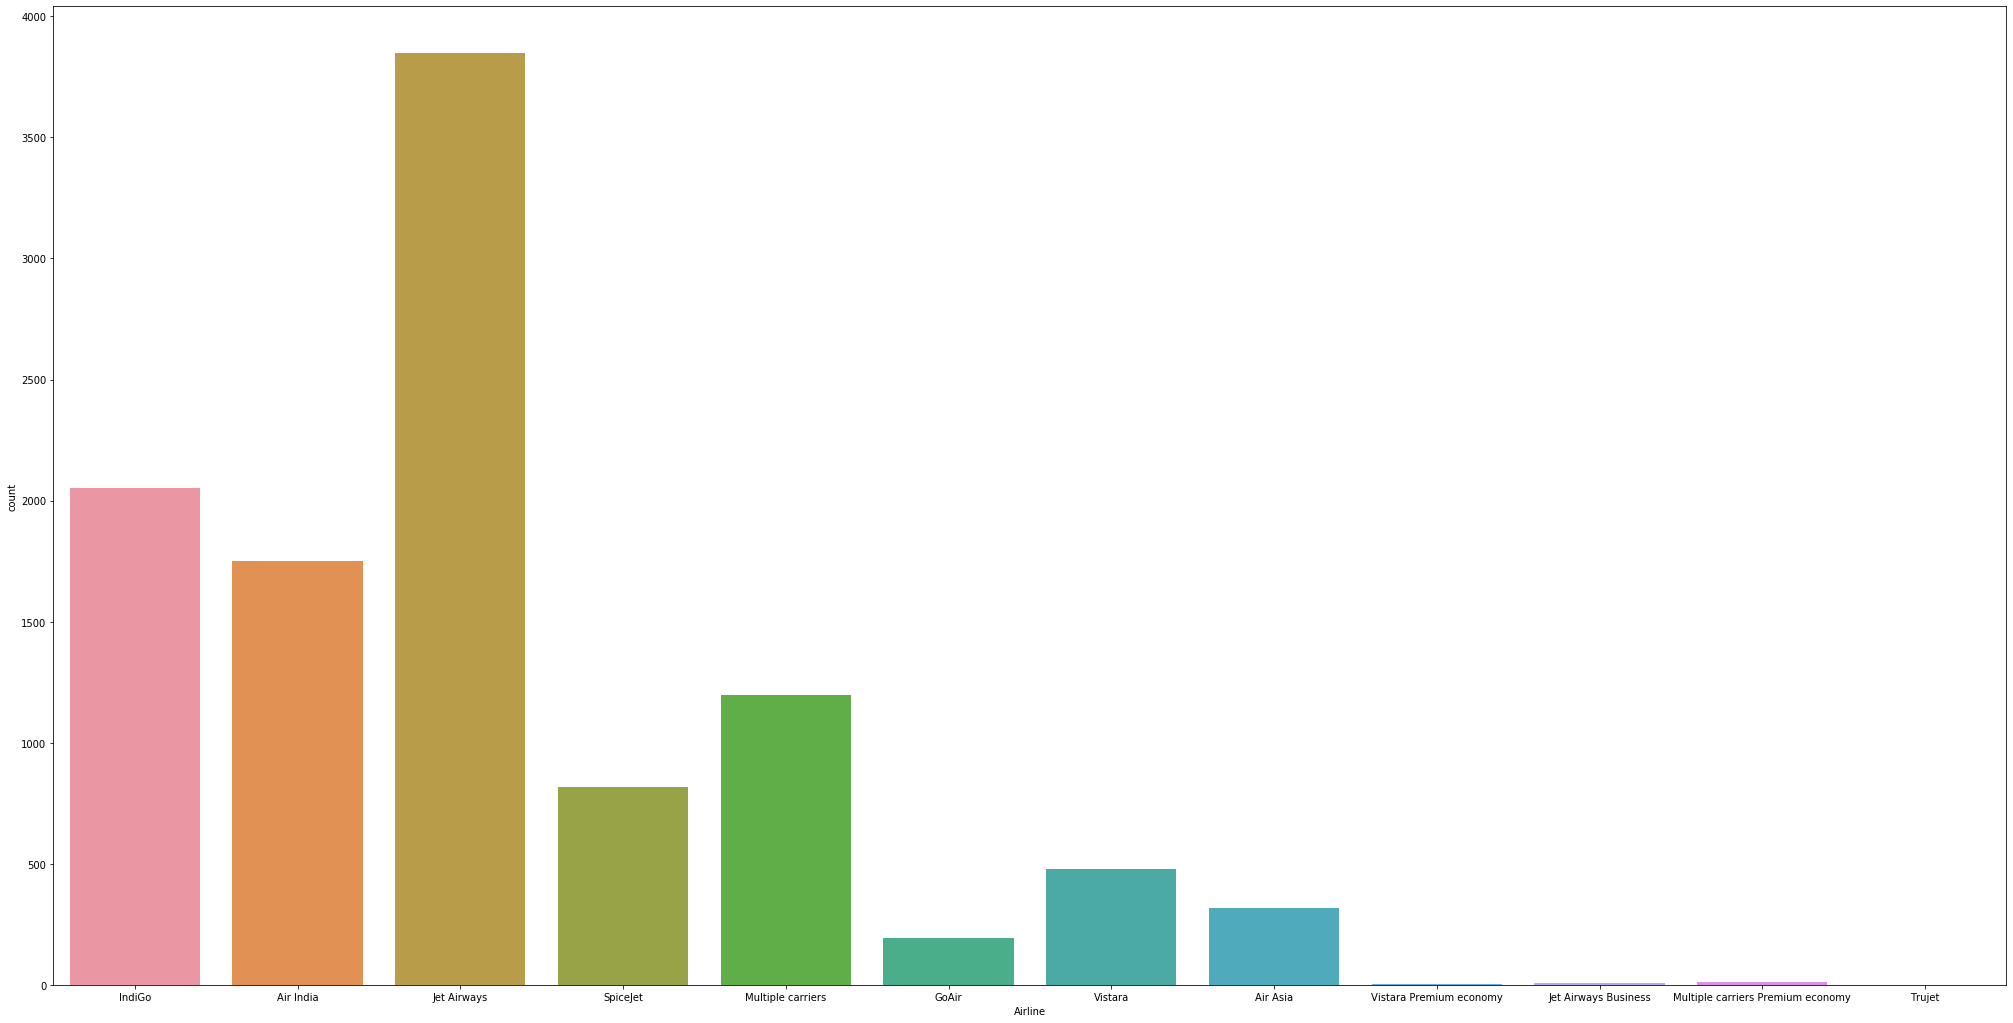

In [722]:
plt.figure(figsize=(35,18))
sns.countplot(Ftrain['Airline'])

In [723]:
Ftrain['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

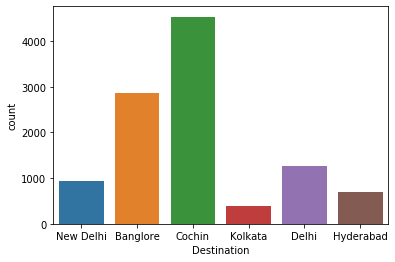

In [724]:
sns.countplot(Ftrain['Destination'])

In [725]:
pd.crosstab(flight_train['Airline'],Ftrain['Total_Stops'])

Total_Stops,1 stop,2 stops,3 stops,non-stop
Airline,,,,
Air Asia,34,14,1,37
Air India,234,75,1,130
GoAir,24,6,0,16
IndiGo,288,63,1,159
Jet Airways,490,122,1,284
Jet Airways Business,1,0,0,1
Multiple carriers,187,47,1,112
Multiple carriers Premium economy,2,1,0,0
SpiceJet,106,27,1,74


In [726]:
#extracting the month from the flight date
Ftrain['Date_of_Journey'] = pd.to_datetime(Ftrain['Date_of_Journey'])
Ftrain['Month'] =Ftrain['Date_of_Journey'].dt.month
Ftrain['Day'] = Ftrain['Date_of_Journey'].dt.day

In [727]:
Ftrain.sort_values('Date_of_Journey', inplace = True)

Text(0, 0.5, 'Count of flights')

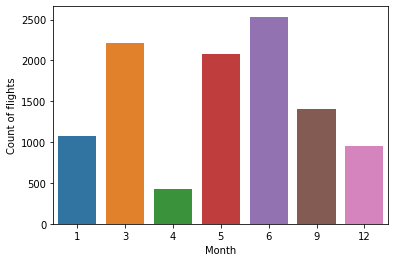

In [728]:
sns.countplot(x = 'Month', data = Ftrain)
plt.xlabel('Month')
plt.ylabel('Count of flights')

Text(0, 0.5, 'Count of flights')

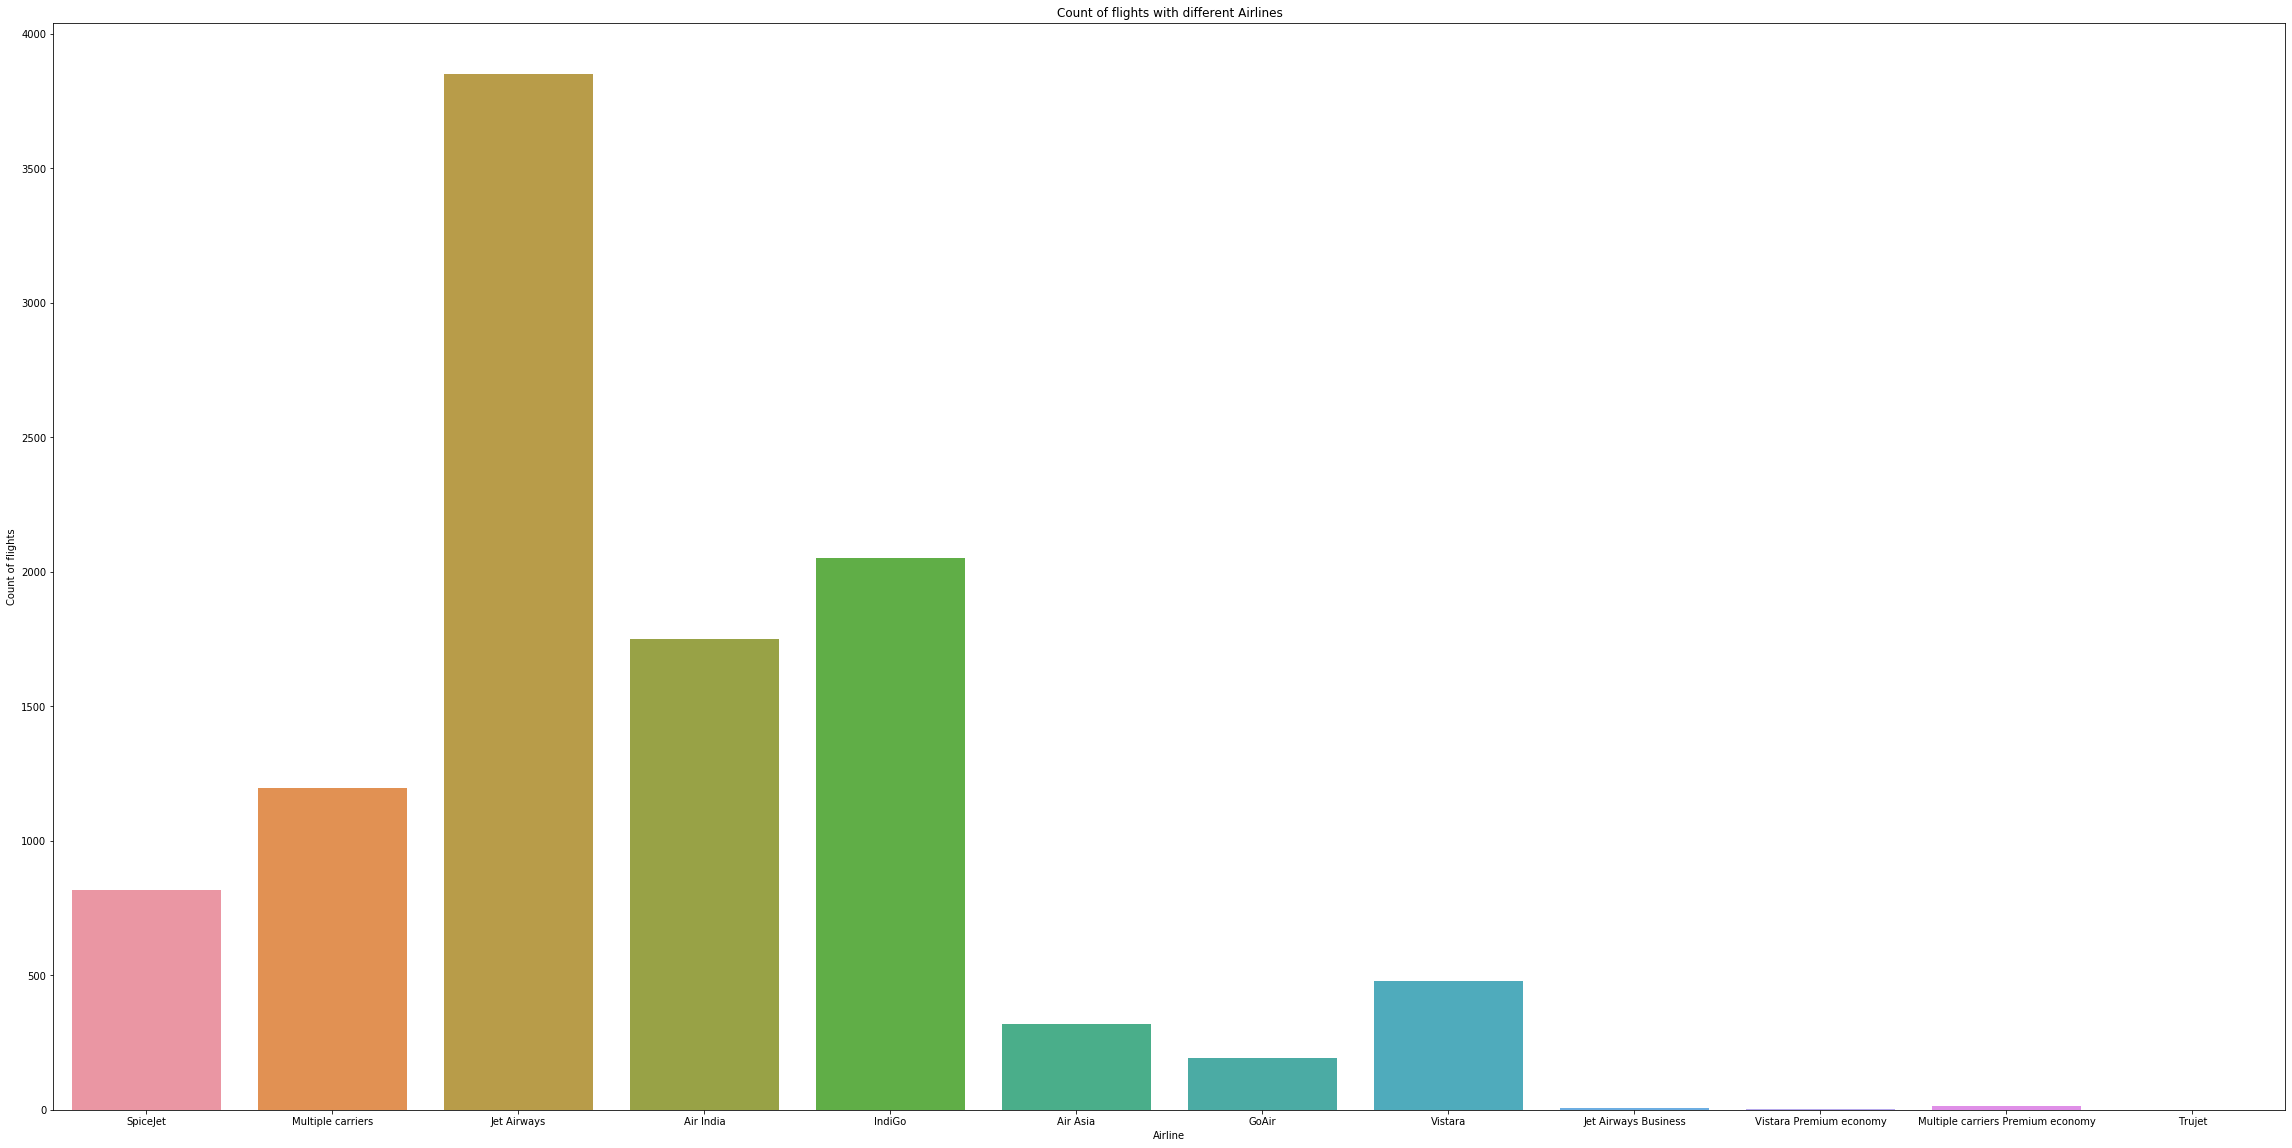

In [729]:
plt.figure(figsize = (40, 20))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = Ftrain)
plt.xlabel('Airline')
plt.ylabel('Count of flights')

In [730]:
Ftrain.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
3835,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,1,3
7356,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528,1,3
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,1,3
3545,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372,1,3
3543,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,1,3


In [731]:
Ftest["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [732]:
import datetime as dt

In [733]:
Ftrain["Dayofjourney"] =pd.to_datetime(Ftrain["Date_of_Journey"]).dt.day
Ftrain["Monthofjourney"] =pd.to_datetime(Ftrain["Date_of_Journey"]).dt.month

In [734]:
Ftrain.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dayofjourney,Monthofjourney
1079,Air India,2019-06-24,Delhi,Cochin,DEL → HYD → MAA → COK,07:05,09:25 25 Jun,26h 20m,2 stops,No info,11185,6,24,24,6
6191,Air India,2019-06-21,Kolkata,Banglore,CCU → BLR,14:15,16:45,2h 30m,non-stop,No info,5510,6,21,21,6
608,Jet Airways,2019-01-05,Kolkata,Banglore,CCU → BOM → BLR,14:05,12:00 02 May,21h 55m,1 stop,In-flight meal not included,9663,1,5,5,1
7794,Jet Airways,2019-06-24,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 25 Jun,22h 55m,2 stops,In-flight meal not included,10368,6,24,24,6
1302,Jet Airways,2019-05-21,Kolkata,Banglore,CCU → BOM → BLR,06:30,18:15,11h 45m,1 stop,No info,14781,5,21,21,5


In [735]:
Ftrain.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [736]:
Ftrain["Hourofdep"] = pd.to_datetime(Ftrain["Dep_Time"]).dt.hour
Ftrain["Minofdep"] = pd.to_datetime(Ftrain["Dep_Time"]).dt.minute
Ftrain["Hourofarrival"] = pd.to_datetime(Ftrain["Arrival_Time"]).dt.hour
Ftrain["Minofarrival"] = pd.to_datetime(Ftrain["Arrival_Time"]).dt.minute



In [737]:
Ftrain.drop(["Dep_Time"], axis = 1, inplace = True)
Ftrain.drop(["Arrival_Time"], axis = 1, inplace = True)

In [738]:
Ftrain.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5515,1,3,3,1,9,0,11,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,29528,1,3,3,1,0,20,13,20
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 20m,1 stop,No info,26890,1,3,3,1,8,55,15,15
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,26h 20m,2 stops,No info,19372,1,3,3,1,8,50,11,10
3543,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,1,3,3,1,10,5,13,0


In [739]:
#This was a new code and experience for me dealing with time variable so i have taken reference from youtube and for loops

duration = list(Ftrain["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]       

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [740]:
Ftrain["Duration_hours"] = duration_hours
Ftrain["Duration_mins"] =duration_mins

In [741]:
Ftrain.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival,Duration_hours,Duration_mins
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5515,1,3,3,1,9,0,11,30,2,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,29528,1,3,3,1,0,20,13,20,13,0
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 20m,1 stop,No info,26890,1,3,3,1,8,55,15,15,6,20
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,26h 20m,2 stops,No info,19372,1,3,3,1,8,50,11,10,26,20
3543,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,1,3,3,1,10,5,13,0,2,55


In [742]:
Ftrain.drop('Duration',axis=1,inplace=True)

In [743]:
Ftrain.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival,Duration_hours,Duration_mins
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,5515,1,3,3,1,9,0,11,30,2,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,29528,1,3,3,1,0,20,13,20,13,0
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,1,3,3,1,8,55,15,15,6,20
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2 stops,No info,19372,1,3,3,1,8,50,11,10,26,20
3543,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,10067,1,3,3,1,10,5,13,0,2,55


In [744]:
Ftrain['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [745]:
def convertingstopstonumeric(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0

In [746]:

Ftrain['Total_Stops'] = Ftrain['Total_Stops'].map(convertingstopstonumeric)

In [747]:
Ftrain.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival,Duration_hours,Duration_mins
3835,SpiceJet,Kolkata,Banglore,CCU → BLR,NaN,No info,5515,1,3,3,1,9,0,11,30,2,30
7356,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1.0,No info,29528,1,3,3,1,0,20,13,20,13,0
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1.0,No info,26890,1,3,3,1,8,55,15,15,6,20
3545,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2.0,No info,19372,1,3,3,1,8,50,11,10,26,20
3543,IndiGo,Banglore,New Delhi,BLR → DEL,NaN,No info,10067,1,3,3,1,10,5,13,0,2,55


In [748]:
#Additional info has mostly no info values and route and total stops are correlated so both columns are being dropped

Ftrain.drop(["Route","Additional_Info"],axis=1, inplace=True)

In [682]:
Ftrain.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival,Duration_hours,Duration_mins
3835,SpiceJet,Kolkata,Banglore,NaN,5515,1,3,3,1,9,0,11,30,2,30
7356,Multiple carriers,Delhi,Cochin,1.0,29528,1,3,3,1,0,20,13,20,13,0
486,Jet Airways,Banglore,New Delhi,1.0,26890,1,3,3,1,8,55,15,15,6,20
3545,Air India,Banglore,New Delhi,2.0,19372,1,3,3,1,8,50,11,10,26,20
3543,IndiGo,Banglore,New Delhi,NaN,10067,1,3,3,1,10,5,13,0,2,55


In [749]:
Ftrain.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops       3491
Price                0
Month                0
Day                  0
Dayofjourney         0
Monthofjourney       0
Hourofdep            0
Minofdep             0
Hourofarrival        0
Minofarrival         0
Duration_hours       0
Duration_mins        0
dtype: int64

In [751]:
Ftrain['Total_Stops'].fillna(Ftrain['Total_Stops'].mean(),inplace=True)

In [752]:
Ftrain.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Month             0
Day               0
Dayofjourney      0
Monthofjourney    0
Hourofdep         0
Minofdep          0
Hourofarrival     0
Minofarrival      0
Duration_hours    0
Duration_mins     0
dtype: int64

In [753]:
Airline = Ftrain[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

In [754]:
Source =Ftrain[["Source"]]

Source =pd.get_dummies(Source, drop_first=True)

In [755]:
Destination =Ftrain[["Destination"]]

Destination =pd.get_dummies(Destination, drop_first=True)

In [756]:
Ftrain=pd.concat([Ftrain,Airline,Source,Destination], axis=1)

In [757]:
Ftrain.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
3835,SpiceJet,Kolkata,Banglore,1.224308,5515,1,3,3,1,9,...,0,0,0,1,0,0,0,0,0,0
7356,Multiple carriers,Delhi,Cochin,1.000000,29528,1,3,3,1,0,...,0,0,1,0,0,1,0,0,0,0
486,Jet Airways,Banglore,New Delhi,1.000000,26890,1,3,3,1,8,...,0,0,0,0,0,0,0,0,0,1
3545,Air India,Banglore,New Delhi,2.000000,19372,1,3,3,1,8,...,0,0,0,0,0,0,0,0,0,1
3543,IndiGo,Banglore,New Delhi,1.224308,10067,1,3,3,1,10,...,0,0,0,0,0,0,0,0,0,1


In [758]:
Ftrain.drop(["Airline","Source", "Destination"], axis=1, inplace=True)

In [759]:
Ftrain.head()

,Total_Stops,Price,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
3835,1.224308,5515,1,3,3,1,9,0,11,30,...,0,0,0,1,0,0,0,0,0,0
7356,1.000000,29528,1,3,3,1,0,20,13,20,...,0,0,1,0,0,1,0,0,0,0
486,1.000000,26890,1,3,3,1,8,55,15,15,...,0,0,0,0,0,0,0,0,0,1
3545,2.000000,19372,1,3,3,1,8,50,11,10,...,0,0,0,0,0,0,0,0,0,1
3543,1.224308,10067,1,3,3,1,10,5,13,0,...,0,0,0,0,0,0,0,0,0,1


# WORKING ON TEST DATA

In [760]:
print("Test data Info")
print("-"*75)
print(Ftest.info())

print()
print()

print("Null values :")
print("-"*75)
Ftest.dropna(inplace = True)
print(Ftest.isnull().sum())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [761]:

# Date_of_Journey
Ftest["Journey_day"] = pd.to_datetime(Ftest.Date_of_Journey, format="%d/%m/%Y").dt.day
Ftest["Journey_month"] = pd.to_datetime(Ftest["Date_of_Journey"], format = "%d/%m/%Y").dt.month
Ftest.drop(["Date_of_Journey"], axis = 1, inplace = True)

Ftest["Dep_hour"] = pd.to_datetime(Ftest["Dep_Time"]).dt.hour
Ftest["Dep_min"] = pd.to_datetime(Ftest["Dep_Time"]).dt.minute
Ftest.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
Ftest["Arrival_hour"] = pd.to_datetime(Ftest.Arrival_Time).dt.hour
Ftest["Arrival_min"] = pd.to_datetime(Ftest.Arrival_Time).dt.minute
Ftest.drop(["Arrival_Time"], axis = 1, inplace = True)

In [762]:
duration = list(Ftest["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
Ftest["Duration_hours"] = duration_hours
Ftest["Duration_mins"] = duration_mins
Ftest.drop(["Duration"], axis = 1, inplace = True)

    


In [763]:
print("Airline")
print("-"*75)
print(Ftest["Airline"].value_counts())
Airline = pd.get_dummies(Ftest["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(Ftest["Source"].value_counts())
Source = pd.get_dummies(Ftest["Source"], drop_first= True)


Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [764]:
print("Destination")
print("-"*75)
print(Ftest["Destination"].value_counts())
Destination = pd.get_dummies(Ftest["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
Ftest.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
Ftest.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [765]:

Ftest = pd.concat([Ftest, Airline, Source, Destination], axis = 1)

Ftest.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", Ftest.shape)



Shape of test data :  (2671, 28)


In [766]:
X= Ftrain.drop(['Price'],axis=1)
y=Ftrain['Price']

In [767]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [768]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [769]:
X.head()

,Total_Stops,Month,Day,Dayofjourney,Monthofjourney,Hourofdep,Minofdep,Hourofarrival,Minofarrival,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
3835,1.224308,1,3,3,1,9,0,11,30,2,...,0,0,0,1,0,0,0,0,0,0
7356,1.000000,1,3,3,1,0,20,13,20,13,...,0,0,1,0,0,1,0,0,0,0
486,1.000000,1,3,3,1,8,55,15,15,6,...,0,0,0,0,0,0,0,0,0,1
3545,2.000000,1,3,3,1,8,50,11,10,26,...,0,0,0,0,0,0,0,0,0,1
3543,1.224308,1,3,3,1,10,5,13,0,2,...,0,0,0,0,0,0,0,0,0,1


In [770]:
X.shape

(10682, 31)

In [771]:
y.isnull().sum()

0

In [772]:
X.isnull().sum()

Total_Stops                                  0
Month                                        0
Day                                          0
Dayofjourney                                 0
Monthofjourney                               0
Hourofdep                                    0
Minofdep                                     0
Hourofarrival                                0
Minofarrival                                 0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vista

# Random Forest Regressor

In [773]:
from sklearn.ensemble import RandomForestRegressor
RGR = RandomForestRegressor()
RGR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [775]:
y_pred = RGR.predict(X_test)

In [776]:
RGR.score(X_train, y_train)

0.9551698855676074

In [777]:
RGR.score(X_test, y_test)

0.7622105263484198

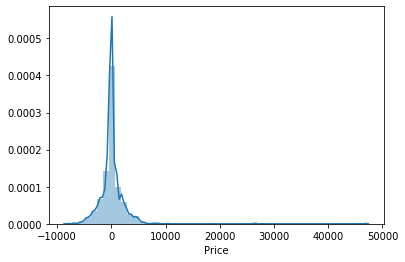

In [778]:
sns.distplot(y_test-y_pred)
plt.show()

In [779]:
from sklearn import metrics

In [780]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1208.6614225634762
MSE: 4930115.084535054
RMSE: 2220.386246700122


# Linear Regression

In [784]:
from sklearn.linear_model import LinearRegression

In [785]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [786]:
Y_Pred = reg.predict(X_test)
Y_Pred

array([13654.78688868,  4308.79512502, 11781.90106861, ...,
        3990.34493133, 12657.92672189,  9117.64940897])

In [787]:
mse = mean_squared_error(y_test, Y_Pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, Y_Pred))

RMSE : 3000.494371016581
Variance score: 0.57


# Between the two , random forest would be a better model for the data